## Data Collection

###  Data Sources
Downloaded the dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant).

### 2.2 Data Description
 - Data Dictionary


| Variable | Role	| Type	    | Description	                     |  Units |
|----------|--------|-----------|------------------------------------|--------|
|AT	       | Feature| Continuous| in the range 1.81°C and 37.11°C	 |   C	  | 
|V	       | Feature| Continuous| in teh range 25.36-81.56 cm Hg	 | cm Hg  |	
|AP	       | Feature| Continuous| in the range 992.89-1033.30 milibar|milibar |	
|RH	       | Feature| Continuous| in the range 25.56 to 100.16%	     |%	      |
|PE	       | Target	| Continuous| 420.26-495.76 MW	                 |MW	  |   

### Variables Information
- Temperature (T) 
- Ambient Pressure (AP),
- Relative Humidity (RH) 
- Exhaust Vacuum (V) 
- Net hourly electrical energy output (EP)

*The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.* 

## Importing and Loading the dataset

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pt

In [2]:
#load dataset
dataset = pd.read_excel('../data/Folds5x2_pp.xlsx')
dataset.to_csv ('Folds5x2_pp.xlsx', index = None,header=True)


> ## Data Exploration and Understanding
In the exploratory data analysis, I will analyze the relationship between the target variable and the independent variables. I will also analyze the relationship between the independent variables. This will help me to understand the data better and to find out the variables that have most impact on the target variable.

In [3]:
print(f"Shape of the dataset: {dataset.shape}")

Shape of the dataset: (9568, 5)


In [4]:
#first 15 values
dataset.head(15)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


In [5]:
#last 10 values
dataset.tail(10)

,AT,V,AP,RH,PE
9558,22.97,62.40,1010.25,75.18,445.30
9559,26.22,49.82,1015.48,55.80,454.20
9560,23.27,68.28,1005.01,74.83,444.86
9561,11.76,41.58,1020.91,88.35,465.45
9562,14.02,40.10,1015.56,82.44,467.32
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


In [6]:
#understading the siz of the dataset
dataset.shape

(9568, 5)

In [7]:
#details about columns, their data types, and non-null values.
print("-----------Dataset Information---------")
dataset.info()

-----------Dataset Information---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [8]:
#basic stats for numerical columns
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
V,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


In [9]:
print("Missing values?")
dataset.isnull().sum()

Missing values?


AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

Insight: "well, fortunately we don't have any missing values!"

In [10]:
# Checking the data types of the columns
dataset.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

In [11]:
# It efficiently tallies the occurrences of each unique value, providing valuable insights into the data's composition.
dataset.value_counts()

AT     V      AP       RH     PE    
8.57   41.17  1020.18  72.47  484.20    2
12.11  41.17  1019.46  62.59  475.53    2
9.54   41.17  1019.79  65.61  481.18    2
11.61  41.17  1019.57  58.82  476.81    2
12.27  41.17  1019.39  52.18  473.84    2
                                       ..
34.40  77.95  1009.83  57.86  430.87    1
34.43  68.51  1010.17  34.09  431.39    1
34.48  74.34  1000.91  42.61  433.94    1
34.51  73.03  1013.73  39.42  439.80    1
37.11  68.94  1006.23  31.15  429.25    1
Name: count, Length: 9527, dtype: int64

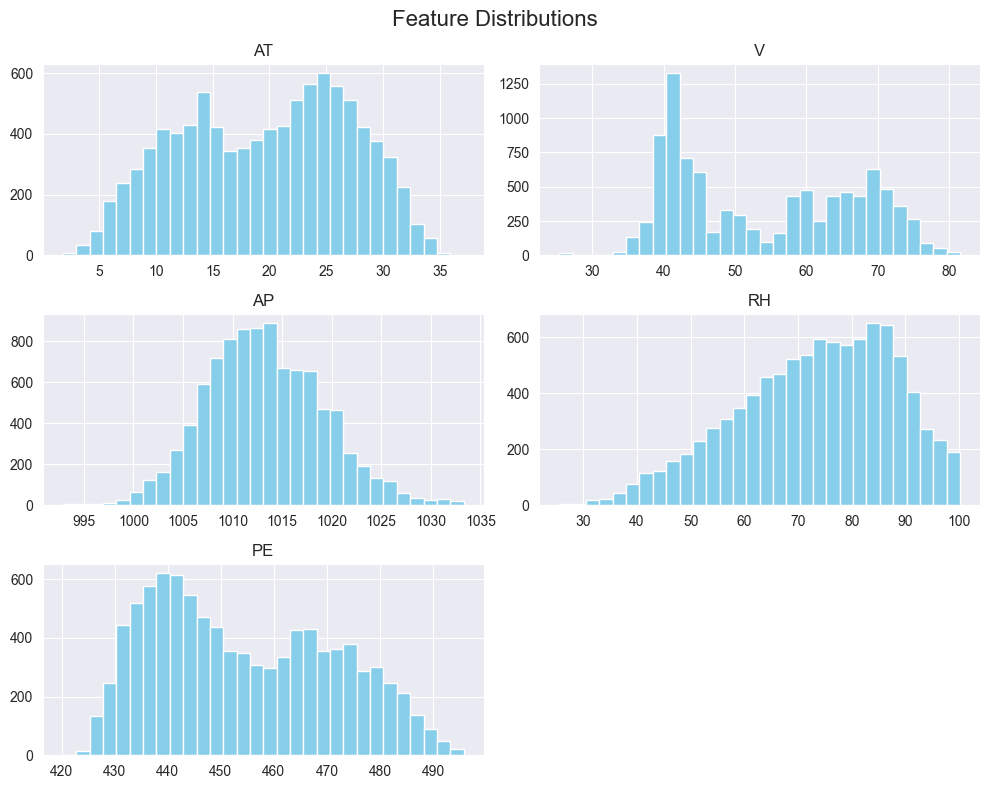

In [12]:
dataset.hist(bins=30, figsize=(10,8), color='skyblue')
pt.suptitle("Feature Distributions", fontsize=16)
pt.tight_layout()
pt.show()

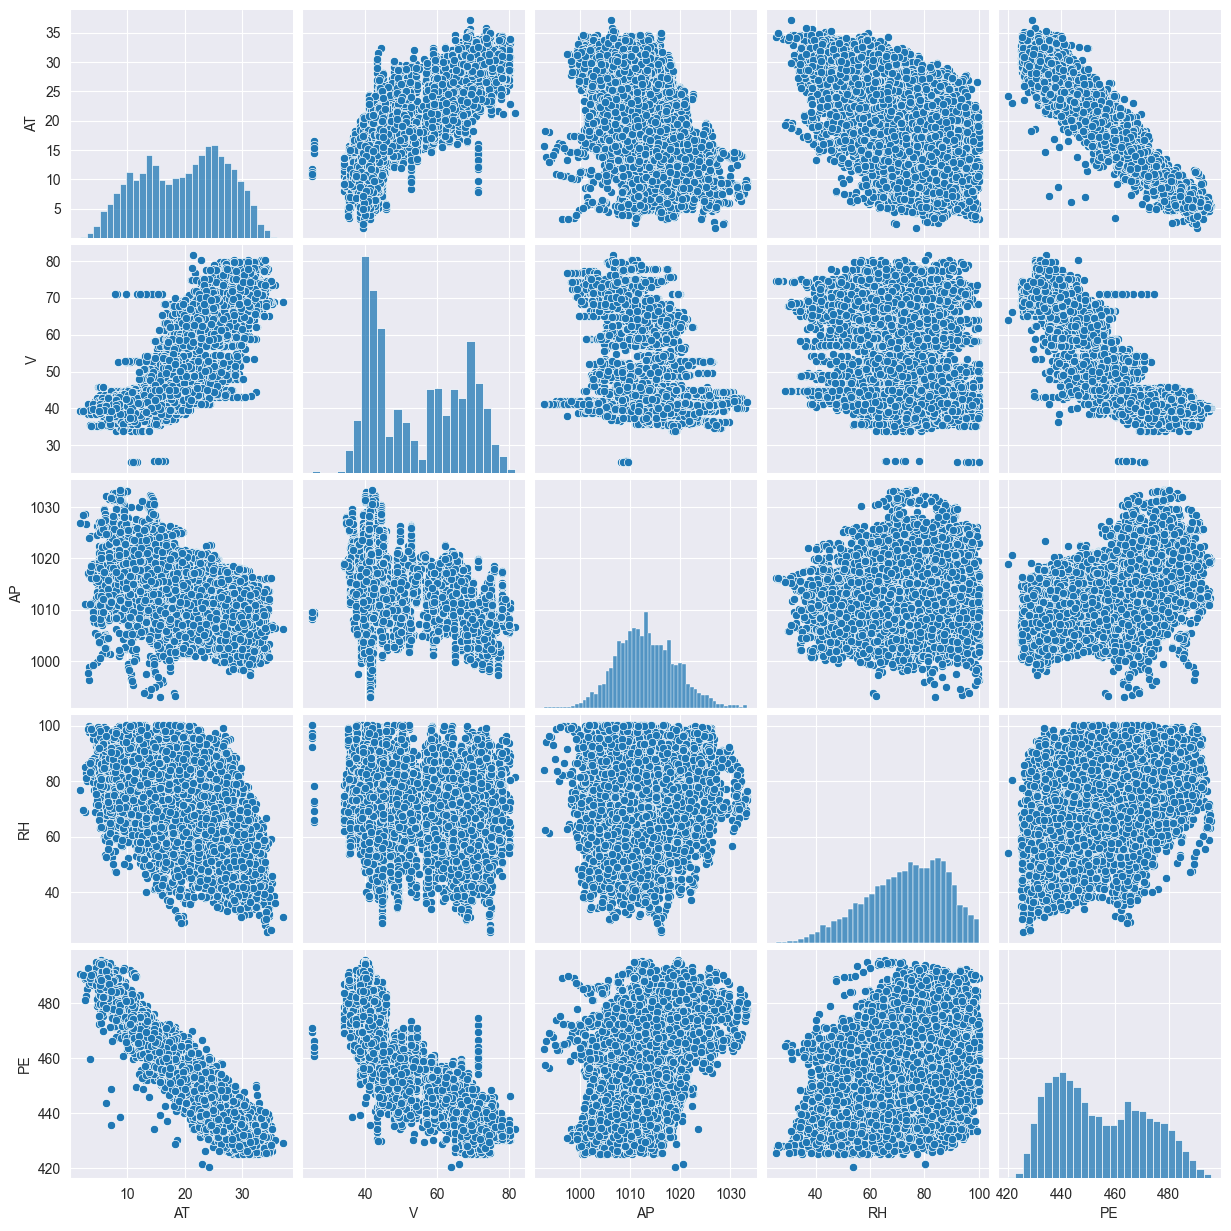

In [13]:
# Pairplots are used to visualize relationships between numerical variables.
# Each plot compares two variables, and the diagonal displays histograms.

sb.pairplot(dataset, vars=['AT', 'V', 'AP', 'RH', 'PE'])

folder_path = "../reports"
file_name = "PAIR_plot.png"
pt.savefig(f"{folder_path}/{file_name}", dpi=300, bbox_inches='tight') 

pt.show()

### INITIAL INSIGHTS
Here is my insights for **Pairplots** for all *columns*:

**Relationships Between Variables:**
There seems to be negative correlation between AT (Ambient Temperature) and PE (Power Output), which makes sense as higher temperatures might reduce efficiency in energy production.
V (Exhaust Vacuum) shows a relatively strong positive correlation with PE.
AP (Ambient Pressure) and RH (Relative Humidity) appear to have weaker relationships with PE.

**Distribution of Features:**
*AT and PE*: Both features show a unimodal distribution but with varying spreads. There might be some data points towards the extremes (potential outliers) in PE.
*AP*: The values are tightly concentrated around the 1010–1020 range, suggesting limited variability. This could potentially reduce its predictive power.
RH: The distribution looks multimodal, with spikes around specific values. This might indicate some seasonal or categorical impact.
*V*: Shows a skewed distribution, which might need transformation (e.g., log-scaling) if it affects the ANN's performance.

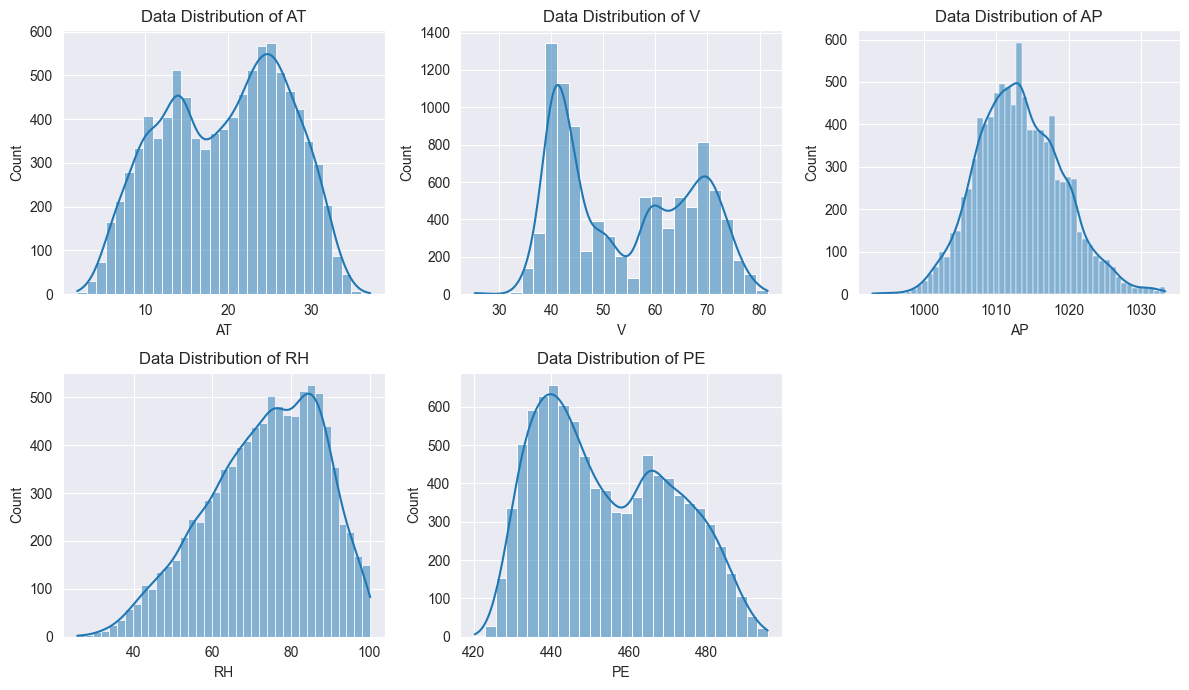

In [14]:
# Data distribution plot
#data's skewness and central tendencies.
pt.figure(figsize=(12, 7))
n_col = dataset.columns
for i, col in enumerate(n_col):
    pt.subplot(2, 3, i+1)
    sb.histplot(data = dataset[col], kde = True)
    pt.title(f"Data Distribution of {col}")
pt.tight_layout()

folder_path6 = "../reports"
file_name6 = "DATADIS_plot.png"
pt.savefig(f"{folder_path6}/{file_name6}", dpi=300, bbox_inches='tight') 
pt.show()

## INITIAL INSIGHTS

 - AT and V: AT has a slightly bimodal distribution, which might indicate that the data was collected under different operational conditions. This is fine but worth noting.
V has multiple peaks, indicating variability in the exhaust vacuum data.

 - AP:Appears to have a near-normal distribution, which is good for modeling.

 - RH: Positively skewed, with more data concentrated at higher relative humidity levels.

 - PE (Target Variable): PE also seems to have a slightly bimodal distribution, which aligns with the nature of the data collection (likely under different operational scenarios).

In [15]:
#Correlation measures the strength of the relationship between two variables
#(range: -1 to +1)
cormatrix = dataset[['AT', 'V', 'AP', 'RH', 'PE']].corr()
cormatrix

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


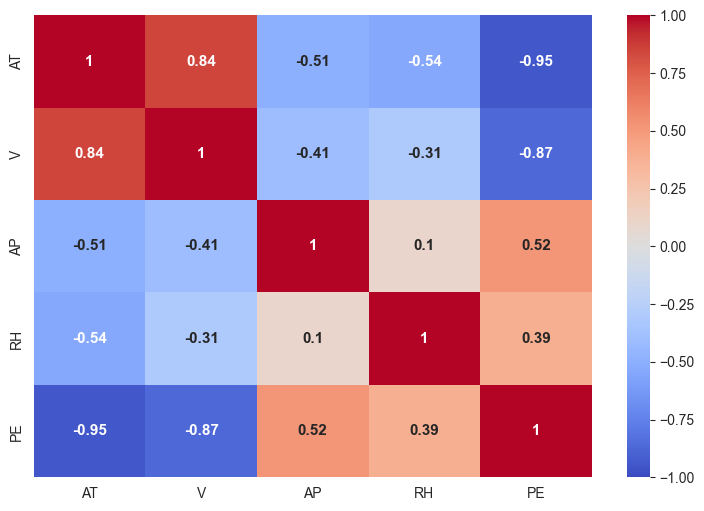

In [16]:
fig, ax = pt.subplots(figsize =(9, 6))
sb.heatmap(cormatrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
           annot_kws = {'fontsize':11, 'fontweight':'bold'})
# folder_path5 = "reports"
# file_name5 = "CORR_plot.png"
# pt.savefig(f"{folder_path5}/{file_name5}", dpi=300, bbox_inches='tight') 
pt.show()

## INITIAL INSIGHTS
Here is my insights for Coorelation heatmap for all columns:

**Target Variable (PE)**:
Strong negative correlation with AT (-0.95) and V (-0.87).
Positive correlation with AP (0.52) and RH (0.39).
AT and V seem to be the most important predictors for PE.

**Multicollinearity Among Features**:
AT and V have a high positive correlation (0.84), which indicates multicollinearity. Using both features as-is might lead to redundancy in the model.
AP and RH have almost no correlation with AT or V but are moderately correlated with each other (0.1).

*Other Features*:
AP and RH show moderate or weak correlations with PE. However, these features might still add value if combined with others.

Multicollinearity Among Features: AT and V have a high positive correlation


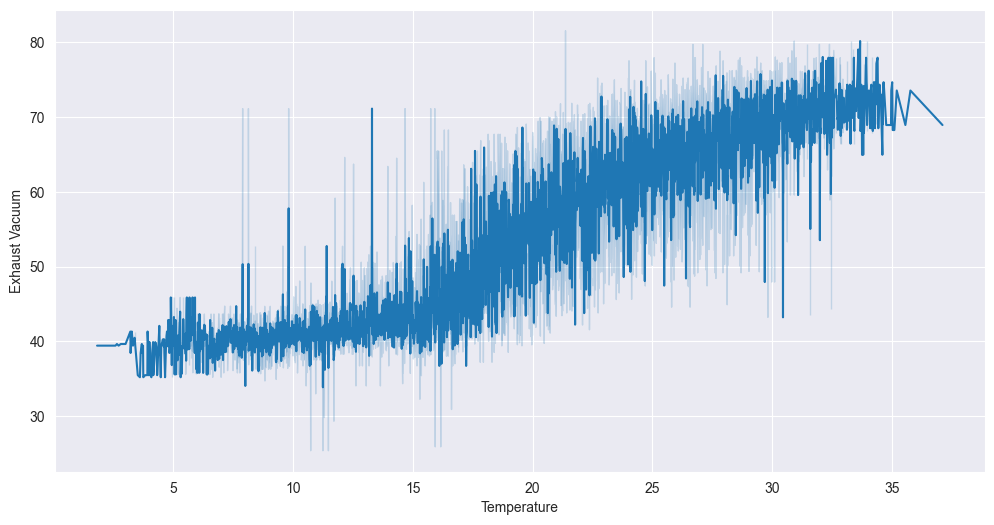

In [17]:
fig, ax = pt.subplots(figsize =(12, 6))
sb.lineplot(data=dataset, x="AT", y="V")
print("Multicollinearity Among Features: AT and V have a high positive correlation")
ax.set_xlabel("Temperature")
ax.set_ylabel("Exhaust Vacuum")
pt.show()

## Looking for outliers or anomalies.

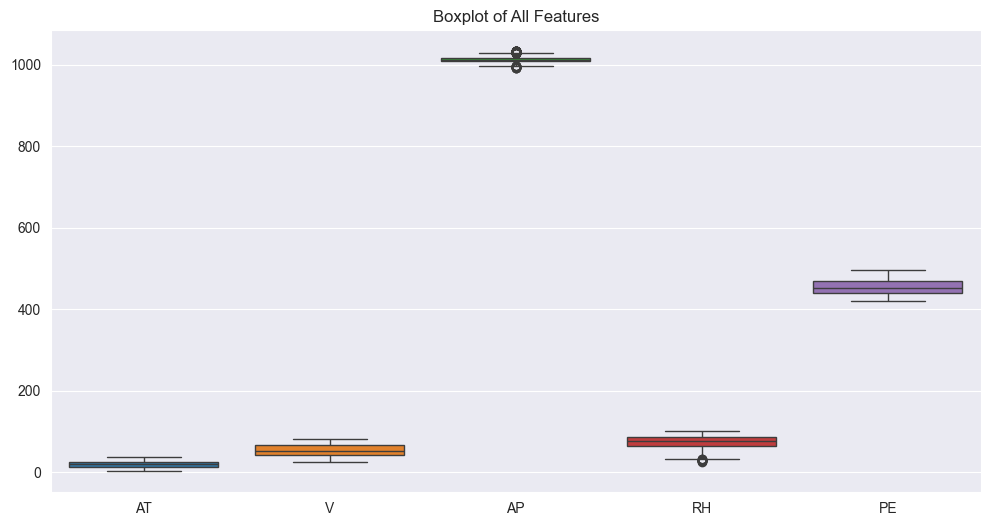

In [18]:
pt.figure(figsize=(12,6))
sb.boxplot(data=dataset)
pt.title("Boxplot of All Features")
pt.show()
